In [22]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import matplotlib.image as mpimg
import numpy.linalg as la
import os
import sys
import math

In [23]:
def readWavFile(filename):
    audio  = wave.open(filename,'r')
    params = audio.getparams()
    signal = audio.readframes(-1)
    #print(type(signal))
    signal = np.frombuffer(signal,'int16')
    signal = np.asarray(signal,dtype='double')
    audio.close()
    return signal, params, audio.getnframes()

In [24]:
def writeWavFile(data,filename,params,framecount):
    # saving audio file
    savefile = wave.open(filename,'wb')
    savefile.setparams(params)
    savefile.setnframes(framecount)
    wsignal = np.asarray(data,dtype='int16')
    savefile.writeframes(wsignal.tobytes()); #writeframes()
    savefile.close()

In [25]:
def plotAudio(data,title='title'):
    fig, ax = plt.subplots()
    #ax.plot(t, s)
    ax.plot(data)
    ax.set(xlabel='samples', ylabel='Signal', title=title)
    ax.grid()
    fig.savefig(title+".png")
    plt.show()

In [26]:
audio1, params1, frameCnt1 = readWavFile('../Data/wav/chase.wav')
#plotAudio(audio1,'audio file #1')
#frameCnt1Save = int(frameCnt1/2)
#audio1Save = audio1[:frameCnt1Save]
#print(audio1Save.size,frameCnt1Save)
#writeWavFile(audio1Save,'../Data/wav/TrumphetWrite.wav',params1,frameCnt1Save)

audio2, params2, frameCnt2 = readWavFile('../Data/wav/Trumphet.wav')
#plotAudio(audio2,'audio file #2')
#frameCnt2Save = int(frameCnt2/2)
#audio2Save = audio2[:frameCnt2Save]
#print(audio2Save.size,frameCnt2Save)
#writeWavFile(audio2Save,'../Data/wav/DrumWrite.wav',params2,frameCnt2Save)

In [27]:
if frameCnt1<frameCnt2:
    frameCnt2 = frameCnt1
    audio2 = audio2[:frameCnt2]
    print(audio1.shape,audio2.shape)
else:
    frameCnt1 = frameCnt2
    audio1 = audio1[:frameCnt1]
    print(audio1.shape,audio2.shape)

(403776,) (403776,)


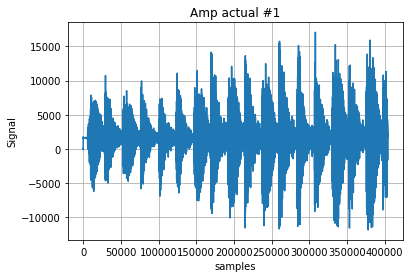

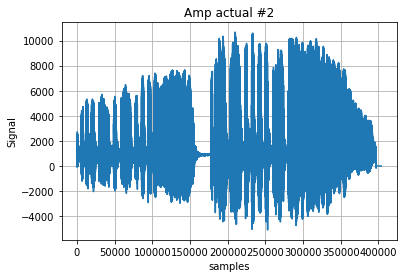

In [28]:
plotAudio(audio1,'Amp actual #1')
plotAudio(audio2,'Amp actual #2')

In [29]:
a1m = np.mean(audio1)
a1s = np.std(audio1)
a1 = (audio1-a1m)/a1s

a2m = np.mean(audio2)
a2s = np.std(audio2)
a2 = (audio2-a2m)/a2s

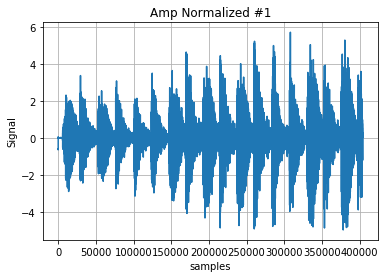

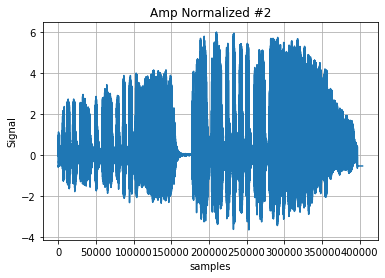

In [31]:
plotAudio(a1,'Amp Normalized #1')
plotAudio(a2,'Amp Normalized #2')

In [33]:
A = np.array([[1.2,0.3],[0.3,0.8]])

mix1 = A[0][0]*audio1 + A[0][1]*audio2
mix2 = A[1][0]*audio1 + A[1][1]*audio2

writeWavFile(mix1,'../Data/wav/mix1.wav',params1,frameCnt1)
writeWavFile(mix2,'../Data/wav/mix2.wav',params2,frameCnt2)


In [54]:
x = np.array([mix1,mix2])
u,s,v = la.svd(x.T,full_matrices=False)
z = u
zs = np.std(z,axis=0)
z1 = z[:,0].T/zs[0]
z2 = z[:,1].T/zs[1]

0.999999999999991
